In [2]:
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import collections

In [2]:
image = cv.imread("cameraman.png")
image.shape[0]

256

In [3]:
img1 = cv.imread("new_im.jpg")

In [175]:
img1.shape[1]

360

In [5]:
# (row, col) = img.shape[0:2]
 
# # Take the average of pixel values of the BGR Channels
# # to convert the colored image to grayscale image
# for i in range(row):
#     for j in range(col):
#         # Find the average of the BGR pixel values
#         img[i, j] = sum(img[i, j]) * 0.33
 

# plt.imshow(img)


In [233]:
# plt.hist(img1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
gray_image = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray_image.shape

(360, 360)

In [11]:
#  gray_image1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

In [12]:
 histr = cv.calcHist([gray_image],[0],None,[256],[0,256])

In [13]:
hist=np.array(255*(histr.flatten()/(1020*850)))
hist.shape

(256,)

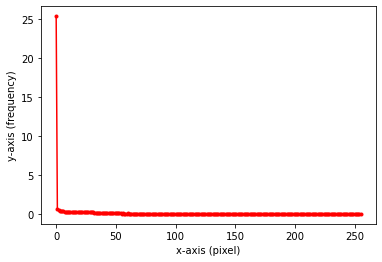

In [14]:
plt.plot(hist,".-r")
plt.xlabel('x-axis (pixel)')
plt.ylabel('y-axis (frequency)')
plt.show()

**Negation**


In [15]:
negation =1 + np.max(gray_image)-gray_image

In [16]:
negation = np.array(negation, dtype = np.uint8)

In [17]:
negation.flatten().shape

(129600,)

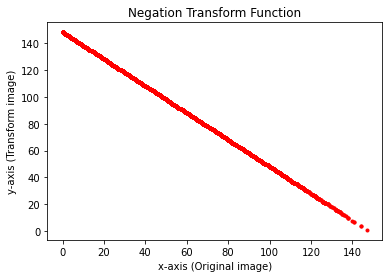

In [18]:
plt.plot(gray_image.flatten(),negation.flatten(),'.r')
plt.title('Negation Transform Function')
plt.xlabel('x-axis (Original image)')
plt.ylabel('y-axis (Transform image)')
plt.show()

In [19]:
cv.imwrite('negationRose.jpg', negation)

True

In [20]:
img1 = plt.imread("negationRose.jpg")

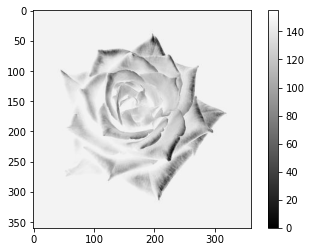

In [21]:
plt.imshow(img1, cmap="gray")
plt.colorbar()
plt.show()

**Log Transformation**

In [22]:
c = 255/(np.log(1 + np.max(gray_image)))
log_transformed = c * np.log(1 + gray_image)
  

log_transformed = np.array(log_transformed, dtype = np.uint8)
  

cv.imwrite('log_transformed.jpg', log_transformed)

True

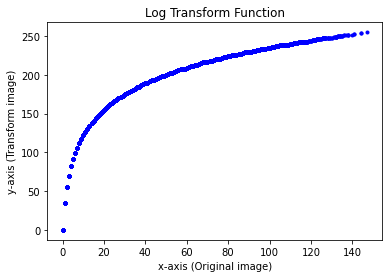

In [23]:
plt.plot(gray_image.flatten(),log_transformed.flatten(),'.b')
plt.title('Log Transform Function')
plt.xlabel('x-axis (Original image)')
plt.ylabel('y-axis (Transform image)')
plt.show()

In [24]:
img2 = plt.imread("log_transformed.jpg")

In [25]:
# plt.plot(df_new["old"])
# plt.xlabel('x-axis (intensity)')
# plt.ylabel('y-axis (Equalised histogram)')
# plt.grid()
# plt.show()

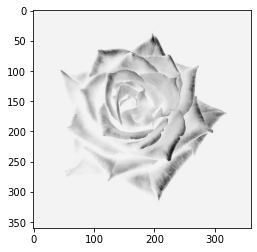

In [27]:
plt.imshow(img1,cmap="gray")

**Gamma Correction**

In [53]:
for gamma in [0.1, 0.5, 1.2, 2.2]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)
#     img3= plt.imread('gamma_transformed'+str(gamma)+'.jpg')
#     plt.imshow(img3)

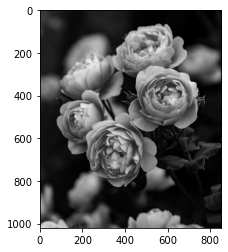

In [54]:
for gamma in [0.1, 0.5, 1.2, 2.2]:
    img3= plt.imread('gamma_transformed'+str(gamma)+'.jpg')
    plt.imshow(img3)

## Histogram equalization

In [ ]:
image = cv.imread("cameraman.png")
img1 = cv.imread("new_im.jpg")

In [7]:
class Equalization:
    def __init__(self,img):
        self.img=img.copy()
        self.gray_image = cv.cvtColor(self.img, cv.COLOR_BGR2GRAY) #grey img creation
        self.histogram = cv.calcHist([self.gray_image],[0],None,[256],[0,256])
    def transformation(self):
        self.frac_intensity=np.array(self.histogram.flatten()/(self.img.shape[1]*self.img.shape[0])) 
        #fractional frequency density of pixels by intensity
        self.Tf=[]
        new=0
        for i in self.frac_intensity:
            new+=i
            self.Tf.append(255*new)
        return self.Tf #transformation function
    def plot_tf(self):
        plt.title("Transformation Function")
        plt.plot(self.transformation())
        plt.xlabel('x-axis (intensity)')
        plt.ylabel('y-axis (Transformation function)')
        plt.grid()
        plt.show()
    def transformed_hist(self):
        new_hist=np.round(self.transformation())
        new_intensity=[int(item) for item in new_hist]
        dict={"s":new_intensity,"p(r)pdf of r":self.frac_intensity}
        self.df=pd.DataFrame(dict)
        #creating index column
        self.df['index'] = range(0, len(self.df) )
        new=self.df["s"]
        #creating a column to club same intensity pixels' fractional frequency intensity together
        summation=[]
        for x in new:
            summation.append(self.df["p(r)pdf of r"][self.df["s"]==x].sum())
        self.df["grp_summation"]=summation
        return self.df
    def plot_histogram(self):
        df=self.transformed_hist()
        plt.subplots(figsize=(10, 6))
        plt.plot(df["index"],df["p(r)pdf of r"],label="Original Histogram")
        plt.plot(df["s"],df["grp_summation"],label="Equalised Histogram")
        plt.title(" histogram representation")
        plt.xlabel('x-axis (intensity)')
        plt.ylabel('y-axis ( histogram)')
        plt.legend()
        plt.grid()
        plt.show()
    def plot_transformed_image(self):
        df=self.transformed_hist()
        img1_new=self.img.copy()
        """ Transformation of transformed histogram back into image"""
        grp_sum=df["grp_summation"]
        old_index=df["index"]
        new_index=df["s"]
        for i in range(self.img.shape[0]):
            for j in range (self.img.shape[1]):
                c=df["s"][df["index"]==self.gray_image[i,j]]
                img1_new[i,j]=c[self.gray_image[i,j]]
            
        self.t_img=img1_new[:,:]
        
        plt.subplot(1,2,1)
        plt.title("Transformed image")
        plt.imshow(img1_new[:,:],cmap="gray") #transformed image
        plt.subplot(1,2,2)
        plt.title("Original image")
        plt.imshow(self.gray_image,cmap="gray") #original image
        
        

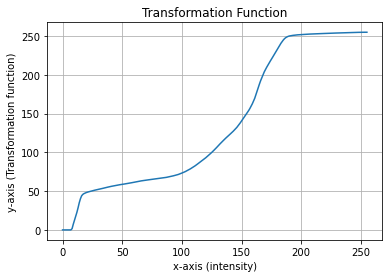

In [8]:
hist_equal=Equalization(image)
hist_equal.plot_tf()

In [9]:
df=hist_equal.transformed_hist()
df

,s,p(r)pdf of r,index,grp_summation
0,0,0.000000,0,0.000061
1,0,0.000000,1,0.000061
2,0,0.000000,2,0.000061
3,0,0.000000,3,0.000061
4,0,0.000000,4,0.000061
...,...,...,...,...
251,255,0.000076,251,0.002075
252,255,0.000046,252,0.002075
253,255,0.000015,253,0.002075
254,255,0.000000,254,0.002075


In [10]:
# aggregation_functions = {'old': 'sum'}
# df_new = df.groupby(df['new']).aggregate(aggregation_functions)
    
    
    

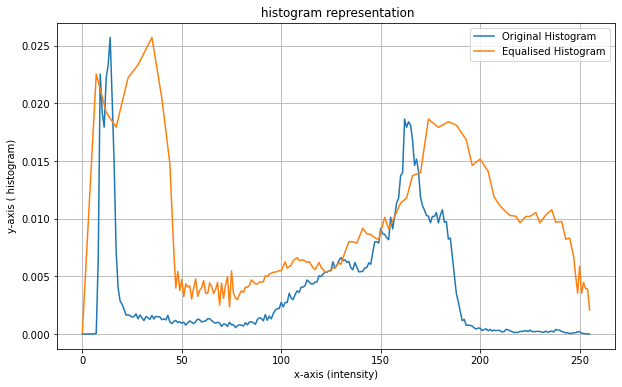

In [11]:
hist_equal.plot_histogram()

In [12]:
equal1=[]
""" CDF of original histogram"""
new=0
for i in df["p(r)pdf of r"]:
    new+=i
    equal1.append(new)

In [13]:
equal=[]
equal.append([])
equal.append([])
""" CDF of equalised histogram"""
new=0
g=dict([(i,x) for i,x in zip(df.s,df.grp_summation)])
for key, i in g.items():
    new+=i
    equal[0].append(key)
    equal[1].append(new)

    
# cdf_equalised=pd.DataFrame.from_dict(equal)

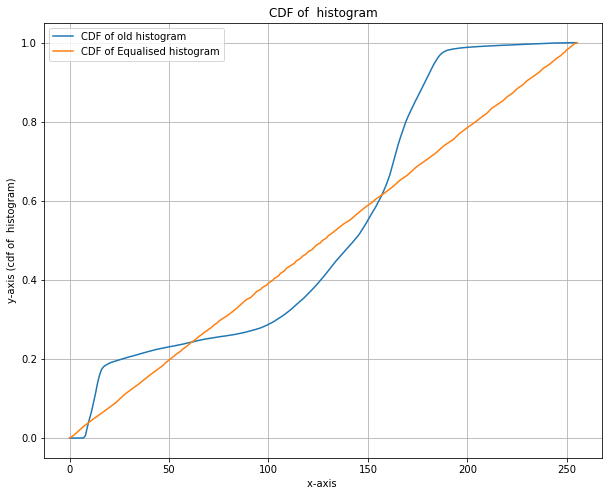

In [14]:
plt.subplots(figsize=(10, 8))


plt.plot(equal1,label="CDF of old histogram")
# plt.title("CDF of old histogram")
# plt.xlabel('x-axis (intensity)')
# plt.ylabel('y-axis (cdf of old histogram)')
# plt.grid()
plt.plot(equal[0],equal[1],label="CDF of Equalised histogram")
plt.title("CDF of  histogram")
plt.xlabel('x-axis ')
plt.ylabel('y-axis (cdf of  histogram)')
plt.legend()
plt.grid()


plt.show()

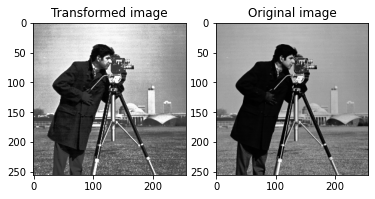

In [15]:
hist_equal.plot_transformed_image()


creating a Histograms Equalization with CV2 

In [16]:
# creating a Histograms Equalization
# of a image using cv2.equalizeHist()
# equ = cv.equalizeHist(img1)
  
# # stacking images side-by-side
# res = np.hstack((img1, equ))
  
# # show image input vs output
# plt.imshow(res,cmap="gray")
  
# cv.waitKey(0)
# cv.destroyAllWindows()

## Histogram Matching

In [86]:
class Matching(Equalization):
    def __init__(self,img):
        super().__init__(img)
    def desired_hist(self):
        df=self.transformed_hist()
        df["specified"]=None
        ar=[]
        for i in range(0,256):
            if(i<6):
                ar.append(0.05)
            elif(5<i<56):
                ar.append(0.004)
            elif(i>55):
                ar.append(0.0025)
            else:
                continue
        df["specified"]=np.array(ar)
        return df
    def plot_desiredhist(self):
        df=self.desired_hist()
        plt.title("Desired Histogram")
        plt.plot(df["specified"])
        plt.xlabel('x-axis (Intensity)')
        plt.ylabel('y-axis (Specified histogram)')
        plt.grid()
        plt.show()
    def transformation_fun(self):
        df=self.desired_hist()
        G=255*df["specified"]
        match=[]
        new=0
        for i in G:
            new+=i
            match.append(new)
        match=np.round(match,3)
        return match
    def matching(self):
        df=self.desired_hist()
        match=self.transformation_fun()
        new_match=[int(item) for item in np.round(match)]
        df["G(z)"]=new_match
        
        return df
    def plot_image(self,):
        df=self.matching()
        
        
        img1_new=self.img.copy()
        """ Transformation of transformed histogram back into image"""
        for i in range(self.img.shape[0]):
            for j in range (self.img.shape[1]):
                c=df["s"][df["index"]==self.gray_image[i,j]]
                img1_new[i,j]=c[self.gray_image[i,j]]
            
        self.t_img=img1_new[:,:]
        
        plt.subplot(1,2,1)
        plt.title("Transformed image")
        plt.imshow(img1_new[:,:],cmap="gray") #transformed image
        plt.subplot(1,2,2)
        plt.title("Original image")
        plt.imshow(self.gray_image,cmap="gray") #original image
    

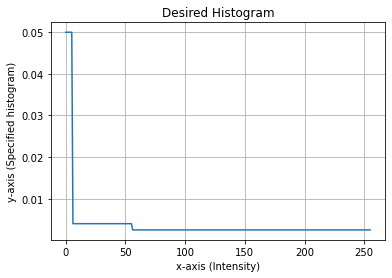

In [87]:
hist_m=Matching(image)
df_matching=hist_m.desired_hist()
hist_m.plot_desiredhist()

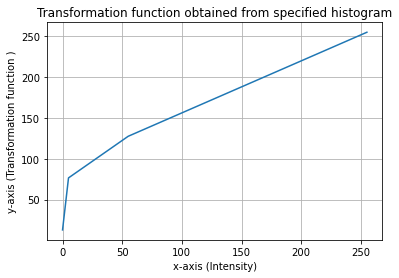

In [88]:
match=hist_m.transformation_fun()
plt.title("Transformation function obtained from specified histogram")
plt.plot(match)
plt.xlabel('x-axis (Intensity)')
plt.ylabel('y-axis (Transformation function )')
plt.grid()
plt.show()

In [89]:
df_matching=hist_m.matching()
df_matching

,s,p(r)pdf of r,index,grp_summation,specified,G(z)
0,0,0.000000,0,0.000061,0.0500,13
1,0,0.000000,1,0.000061,0.0500,26
2,0,0.000000,2,0.000061,0.0500,38
3,0,0.000000,3,0.000061,0.0500,51
4,0,0.000000,4,0.000061,0.0500,64
...,...,...,...,...,...,...
251,255,0.000076,251,0.002075,0.0025,252
252,255,0.000046,252,0.002075,0.0025,253
253,255,0.000015,253,0.002075,0.0025,254
254,255,0.000000,254,0.002075,0.0025,254


In [110]:
s_=df_matching["s"]
s=set(s_)
pdf_s=df_matching["grp_summation"]
Glist=np.array(df_matching["G(z)"].copy())
Glist_orig=df_matching[["index","G(z)"]]
index=df_matching["index"]
dict={"index":index,"pdf_s":pdf_s,"s":s_}
df_edit=pd.DataFrame(dict)

# summation of pdf of s for same s values 
aggregation_functions = {'pdf_s': 'sum'}

df_edit_new = df_edit.groupby(df_edit['s']).aggregate(aggregation_functions)
index_list={}
map_s2g={}

for i  in s:
    y=[]
    index=[]
    index_=[]
    series=set()
    for counter,x in enumerate(Glist):
        if(x<=i):
            y.append(x)
            index.append(counter)
            series.add(max(np.array(Glist_orig['index'][Glist_orig["G(z)"]==x]))) #for reducing the number of mapping element
#             index_.append(series)
    Glist=np.delete(Glist,index)
    if len(series)!=0:
            map_s2g[i]=series
    
    index_list[i]=y #the mapping of s and G(q), there are multiple values of G(q) mapping to a single s, there are even 
                     #repeating values of G(q)
    
    
    

In [111]:
elements_count = collections.Counter(s_)
len(index_list)
# pdfs=df_edit_new["pdf_s"]
pdfs=df_edit["pdf_s"]#grouping of pdf of s values 


In [116]:
max(map_s2g[91])

19

In [123]:
g=[]
s_map=[]
df_matching["g_map_s"]=None
count=0
for key , value  in map_s2g.items():
# for value in range(0,256):
#     key = {i for i in map_s2g if map_s2g[i]==value}
#    if map_s2g[key]
    s_map.append(key)
    


In [130]:
map_s2g[91]

{18, 19}

In [93]:
hist_matching=[] 
"""  histogram matching """
for i in range(0,256):
    if i in s:
        hist_matching.append(pdfs[i])
    else:
        hist_matching.append(0)
    
    

In [94]:
hist_matching[8]

0

In [95]:
df_matching["hist_matching"]=hist_matching
df_matching.sum()

s                35007.000000
p(r)pdf of r         1.000000
index            32640.000000
grp_summation        1.450272
specified            1.000000
G(z)             43708.000000
hist_matching        0.625412
dtype: float64

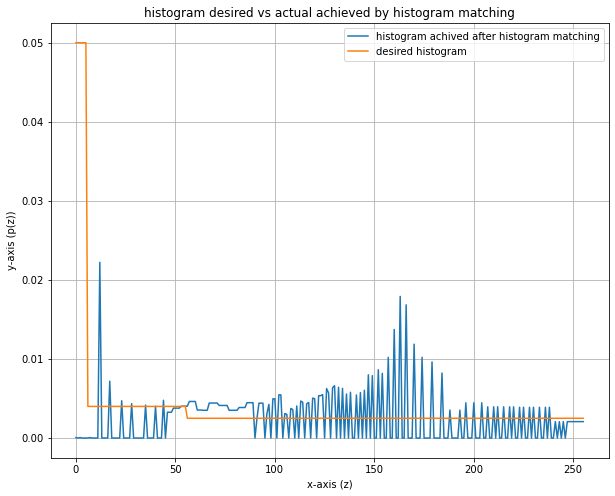

In [96]:
# y=min(Glist, key=lambda x:abs(x-64))
plt.subplots(figsize=(10, 8))
plt.title("histogram desired vs actual achieved by histogram matching")
plt.plot(hist_matching,label="histogram achived after histogram matching")
plt.plot(df_matching["specified"],label="desired histogram")
plt.xlabel('x-axis (z)')
plt.ylabel('y-axis (p(z))') 
plt.legend()
plt.grid()
plt.show()
# d=df_matching['s'][df_matching["G(z)"]==64]
# print(y)

In [150]:

# hist_m.plot_image()

In [255]:
#  min(myList, key=lambda x:abs(x-myNumber))

# Local Histogram Processing

In [69]:
image.shape

(256, 256, 3)

In [73]:
f_w=5 #floating window size(f_w,f_w)
n=image.shape[0] #image size should be square (x,x,3)
target_img_size=n-f_w+1 #dimension of target image 
processed_img1 = np.zeros(shape=(target_img_size, target_img_size))
processed_img2 = np.zeros(shape=(target_img_size, target_img_size))

In [74]:
for i in range(target_img_size):
    for j in range(target_img_size):
        window=image[i:i+f_w, j:j+f_w].flatten()
        elements_count = collections.Counter(window)
        for key in elements_count.keys():
            
            processed_img1[i,j]+=(key*elements_count[key])/(f_w**2) #taking average of all the pixels in the floating  window
        
    

### using varience but not working

In [151]:
for i in range(target_img_size):
    for j in range(target_img_size):
        window=image[i:i+f_w, j:j+f_w].flatten()
        window_sum=0
        elements_count = collections.Counter(window)
        for key in elements_count.keys():
             window_sum+=(key*elements_count[key])/(f_w**2)
        for key in elements_count.keys():
             processed_img2[i,j]+=(((key-window_sum)**2)*elements_count[key])/(f_w**2) #taking average of all the pixels in the floating  window
        

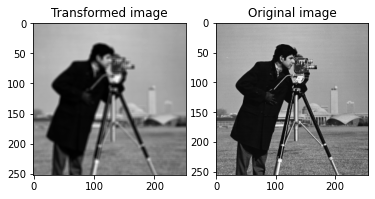

In [75]:
plt.title("local histogram preprocessing")
plt.subplot(1,2,1)
plt.title("Transformed image")
plt.imshow(processed_img1,cmap="gray") #transformed image
plt.subplot(1,2,2)
plt.title("Original image")
plt.imshow(image,cmap="gray") #original image

# Local selective enhancement

In [43]:
f_w=3 #floating window size(f_w,f_w)
#k=0.6,E=4.0 for cameraman

In [135]:
def local_selective_enhancement(image,f_w,k=0.7,E=11.0):
    """ To enhance dark areas leaving light areas unchanged"""
    #k is for controlling threshold
    # E is for changing darker pixels intensity
    n=image.shape[0]
    target_img_size=n-f_w+1 #dimension of target image , here it helps in navigating local area around every pixel.
    processed_img=image[:,:].copy() #making copy of original image 
    
    #calculating global mean
    g_mean=0
    global_img=image[:,:].flatten()
    g_elements_count = collections.Counter(global_img)
    for key in g_elements_count.keys():
        g_mean+=(key*g_elements_count[key])/(image.shape[0]*image.shape[1])
    #processing image
        
    for i in range(target_img_size):
        for j in range(target_img_size):
            window=image[i:i+f_w, j:j+f_w].flatten()
            elements_count = collections.Counter(window)
            local_mean=0
            for key in elements_count.keys():

                local_mean+=(key*elements_count[key])/(f_w**2) #taking average of all the pixels in the floating  window
            if(local_mean <=(k*g_mean)):
                processed_img[i,j]=E*processed_img[i,j] #only changing pixels being darker than the threshold 
    return processed_img
            
img_after=local_selective_enhancement(img1,f_w)              
                
        
    

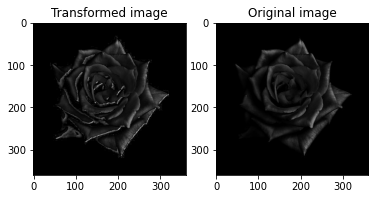

In [136]:
plt.title("local histogram preprocessing")
plt.subplot(1,2,1)
plt.title("Transformed image")
plt.imshow(img_after,cmap="gray") #transformed image
plt.subplot(1,2,2)
plt.title("Original image")
plt.imshow(img1,cmap="gray") #original image

In [29]:
#image blurring , changing window size
# vertical and horizonal line identification

# Image Blurring

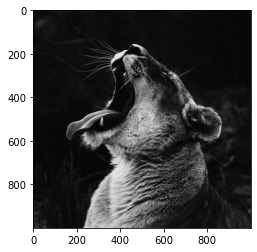

In [30]:
lion=cv.imread("lion.jpg")
lion.shape
lion=lion[0:1000,0:1000]
plt.imshow(lion)

(1600, 800, 3)


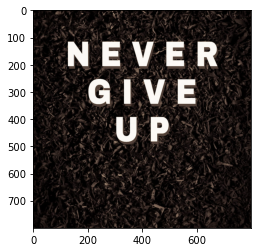

In [31]:
ngu=cv.imread("ngu.jpg")
print(ngu.shape)
ngu=ngu[500:1300,0:800]
plt.imshow(ngu)

## blurring loss of dim

In [137]:
def loss_img_blurr(image,f_w):
    """ 
    Smoothing linear Filters
    using average/ Gaussian here
    """
    image_gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    n=image.shape[0] #image size should be square (x,x,3)
#     ax,fig=plt.subplots(nrows=1, ncols=len(F_w), figsize=[8,8])
    i=0
#     for f_w in F_w:
    
    target_img_size=n-f_w+1 #dimension of target image 
            
    processed_img=image_gray[:,:].astype(float).copy()
#             filter_flatten=filter_window.flatten()
    for i in range(target_img_size):
            for j in range(target_img_size):
                window=image_gray[i:i+f_w, j:j+f_w].flatten()
                elements_count = collections.Counter(window)
                for key in elements_count.keys():
                        processed_img[i,j]+=(key*elements_count[key])/(f_w**2)
#             plt.subplot(1,len(F_w),i)
#             plt.title("Transformed image for window "+str(f_w))
#             plt.imshow(processed_img,cmap="gray")
#             i=i+1
#             
    plt.subplot(1,2,1)
    plt.title("Transformed image")
    plt.imshow(processed_img,cmap="gray") #transformed image
    plt.subplot(1,2,2)
    plt.title("Original image")
    plt.imshow(image,cmap="gray") #original image
#     plt.title("Smoothing Transformation")

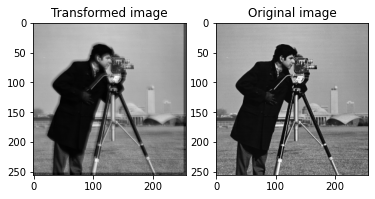

In [139]:
loss_img_blurr(image,5)

## blurring without loss of dim

In [101]:
def matlab_style_gauss2D(shape=(5,5),sigma=1.0):
    
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [102]:
from statistics import mean 
f_w=5                            #floating window size(f_w,f_w) ,should be odd so that its median exits in int 


# spatial_window=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
# spatial_window=1/25*(np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]]))
spatial_window=np.array(np.array(matlab_style_gauss2D()))
spatial_window
# plt.imshow(spatial_window)


array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [107]:
def img_blurring(image,f_w,filter_window):
    """ 
    Smoothing linear Filters
    using average/ Gaussian here
    """
    
    n=image.shape[0] #image size should be square (x,x,3)
    target_img_size=n-f_w+1 #dimension of target image 
    image_gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    processed_img=image_gray[:,:].astype(float).copy()
    filter_flatten=filter_window.flatten()
    for i in range(target_img_size):
        for j in range(target_img_size):
            window=image_gray[i:i+f_w, j:j+f_w]
#             processed_img[i+int(f_w/2),j+int(f_w/2)]=int(sum(np.dot(window,filter_window).flatten()))
            processed_img[i+int(f_w/2),j+int(f_w/2)]=sum(np.dot(window,filter_window).flatten())
    plt.subplot(1,2,1)
    plt.title("Transformed image")
    plt.imshow(processed_img,cmap="gray") #transformed image
    
    plt.subplot(1,2,2)
    plt.title("Original image")
    plt.imshow(image,cmap="gray") #original image
    plt.title("Smoothing Transformation")
    return processed_img

   

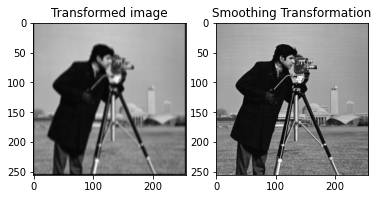

In [108]:
img_blurr=img_blurring(image,f_w,spatial_window)  
x=plt.hist(img_blurr.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()
# plt.plot(x[0])


In [140]:
def img_median_blurring(image,f_w):
    """ 
    order-statistics (non-linear filters)
    using median here
    """
    
    n=image.shape[0] #image size should be square (x,x,3)
    target_img_size=n-f_w+1 #dimension of target image 
    image_gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    processed_img=image_gray[:,:].astype(float).copy()
    for i in range(target_img_size):
        for j in range(target_img_size):
            window=image_gray[i:i+f_w, j:j+f_w]
            processed_img[i+int(f_w/2),j+int(f_w/2)]=np.median(window.flatten())
    #plotting images
    plt.subplot(1,2,1)
    plt.title("Transformed image")
    plt.imshow(processed_img,cmap="gray") #transformed image
    plt.subplot(1,2,2)
    plt.title("Original image")
    plt.imshow(image,cmap="gray") #original image
    return processed_img

   
    

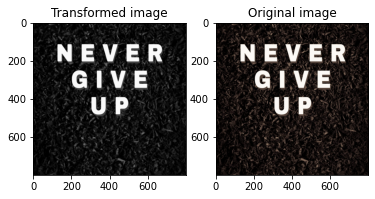

In [141]:
img_blurr=img_median_blurring(ngu,5)  

# Detecting Edges
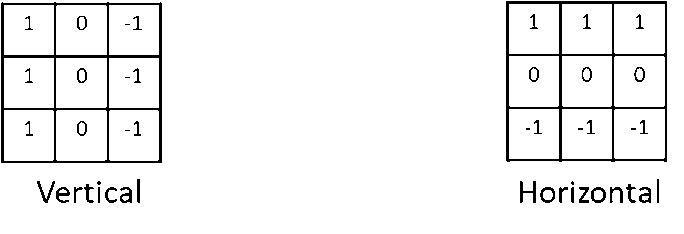

In [5]:

f_w=3 #floating window size(f_w,f_w)
spatial_window_h=np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #horizontal lines detection
spatial_window_v=np.array([[1,0,-1],[1,0,-1],[1,0,-1]]) #vertical lines detection


In [6]:
spatial_window_h

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [44]:
def img_edge_detect(image,f_w,filter_window_v,filter_window_h):
    n=image.shape[0] #image size should be square (x,x,3)
    target_img_size=n-f_w+1 #dimension of target image 
    image_gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    processed_img_v= np.zeros(shape=(target_img_size, target_img_size))
    processed_img_h= np.zeros(shape=(target_img_size, target_img_size))
#     processed_img_h=image_gray[:,:].astype(float).copy()
#     processed_img_v=image_gray[:,:].astype(float).copy()
    for i in range(target_img_size):
        for j in range(target_img_size):
            window=image_gray[i:i+f_w, j:j+f_w]
            window = window.astype('float32')
            filter_window_v = filter_window_v.astype('float32')
            filter_window_h = filter_window_h.astype('float32')
            #print(filter_window_v.dtype)
            #print(window.dtype)
            #print('-----')
            if window.min()==1110:
                print(window)
                print(filter_window_v)
                print(sum(sum(window*filter_window_v)))
            
                break
            
            processed_img_v[i,j]=sum(sum(window*filter_window_v))
            processed_img_h[i,j]=sum(sum(window*filter_window_h))
            
            #processed_img_v[i,j]=sum(np.dot(window,filter_window_v).flatten())
            #processed_img_h[i,j]=sum(np.dot(window,filter_window_h).flatten())
            #print(processed_img_v[i,j].dtype)
#             processed_img_v[i+int(f_w/2),j+int(f_w/2)]=sum(abs(np.dot(window,filter_window_v).flatten()))
#             processed_img_h[i+int(f_w/2),j+int(f_w/2)]=sum(np.dot(window,filter_window_h).flatten())
    
    ax,fig=plt.subplots(nrows=3, ncols=1, figsize=[12,12])
    plt.subplot(1,3,1)
    plt.title("Original image")
    plt.imshow(image,cmap="gray") #original image
    plt.subplot(1,3,2)
    plt.title("Vertical lines detection (image)")
    plt.imshow(processed_img_v,cmap="gray") #original image
    plt.subplot(1,3,3)
    plt.title("Horizontal lines detection (image)")
    plt.imshow(processed_img_h,cmap="gray") #transformed image
    return processed_img_v,processed_img_h



In [36]:
cube.min()

0

In [ ]:
Mitacs: canada 
DAAD: Germany
Email profs.


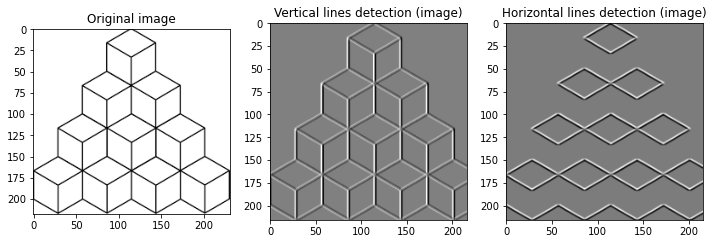

In [45]:
cube=cv.imread("cube.png")
img_edgev, img_edgeh=img_edge_detect(cube,f_w,spatial_window_v,spatial_window_h)     
    
